# Import Libraries
In this section, we import the necessary libraries for data manipulation, visualization, and preprocessing.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv('data.csv')

# Drop Unnecessary Columns
Here, we drop the 'id' column as it is not needed for our analysis.

In [7]:
df = df.drop(columns=['id'])

# Encode Categorical Variables
We perform one-hot encoding on categorical columns with more than 2 classes and convert binary categorical columns to numerical values.

In [3]:
# Perform one-hot encoding on categorical columns with more than 2 classes
df_encoded = pd.get_dummies(df, columns=['work_type', 'smoking_status'], dtype=int)

# Convert gender to is_male
df_encoded['is_male'] = df_encoded['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Encode Residence_type
df_encoded['Residence_type'] = df_encoded['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)

# Convert ever_married to binary
df_encoded['ever_married'] = df_encoded['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)

# Drop the original gender column
df_encoded = df_encoded.drop(columns=['gender'])

# Handle Missing Values
We use KNN Imputer to fill in missing values in the dataset.

In [60]:
# KKN Imputer initialization
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the data
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

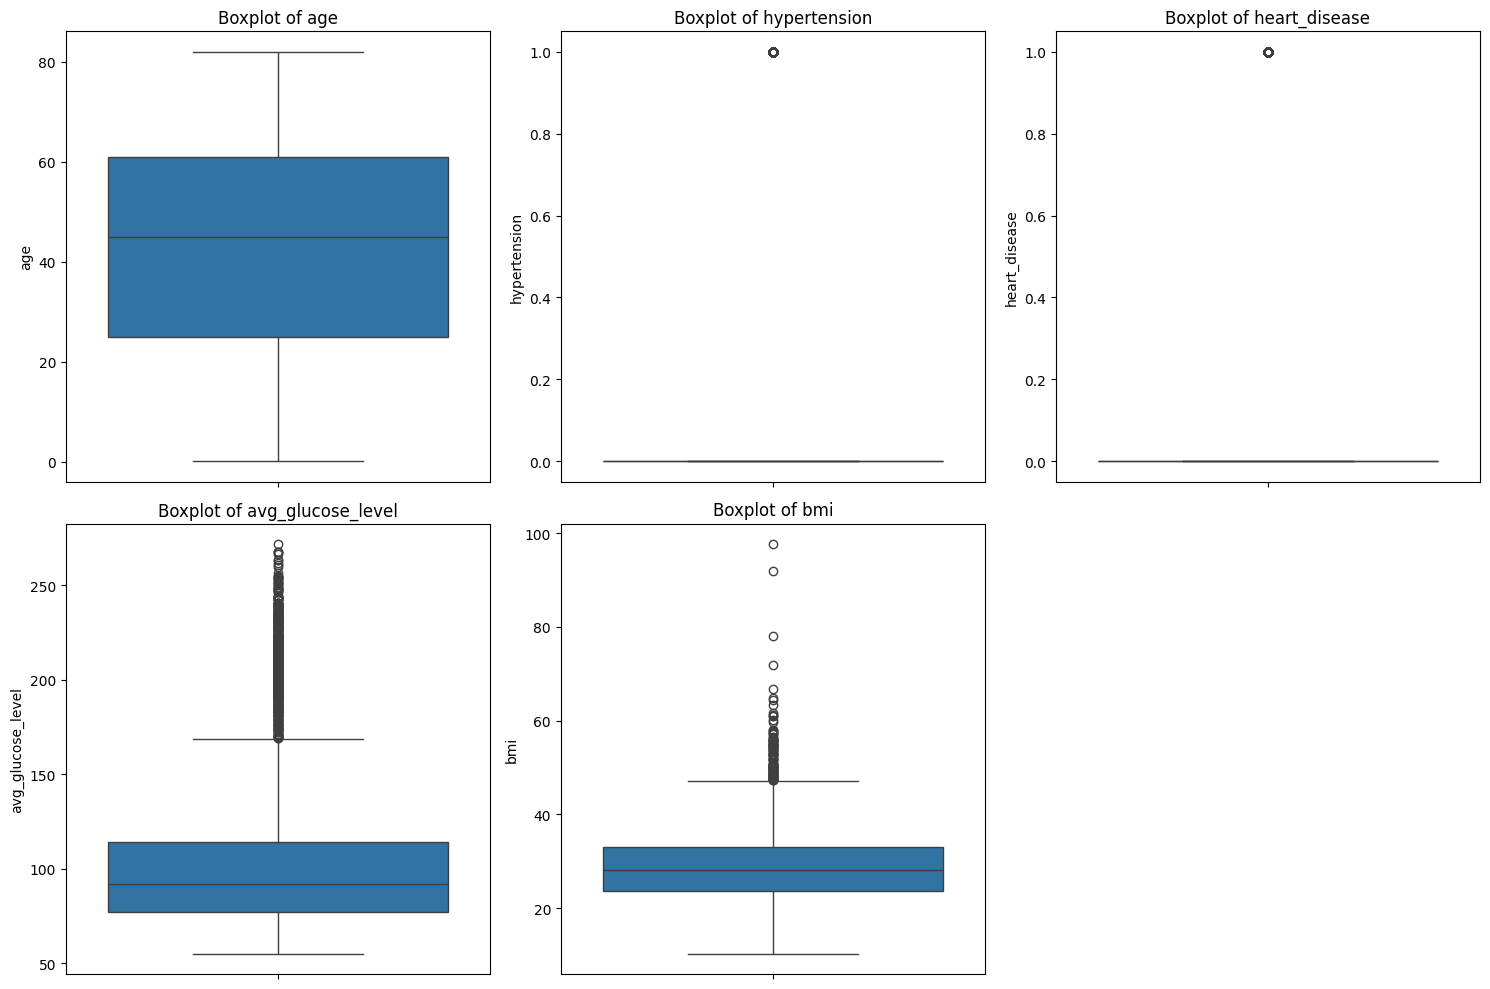

In [48]:
# Plot boxplots for numerical columns to check for outliers
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_encoded[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

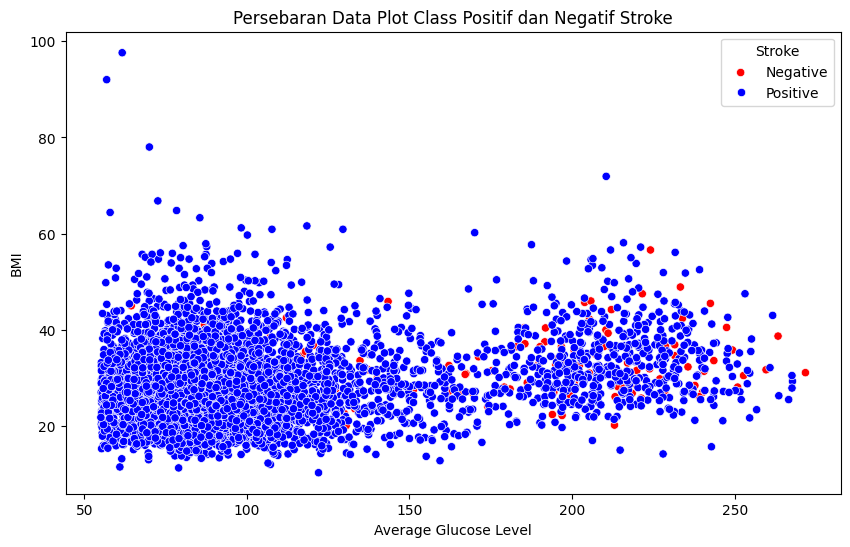

In [49]:
# Visualisasi persebaran data plot class positif dan negatif stroke
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', data=df_encoded, palette=['blue', 'red'])
plt.title('Persebaran Data Plot Class Positif dan Negatif Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.legend(title='Stroke', labels=['Negative', 'Positive'])
plt.show()

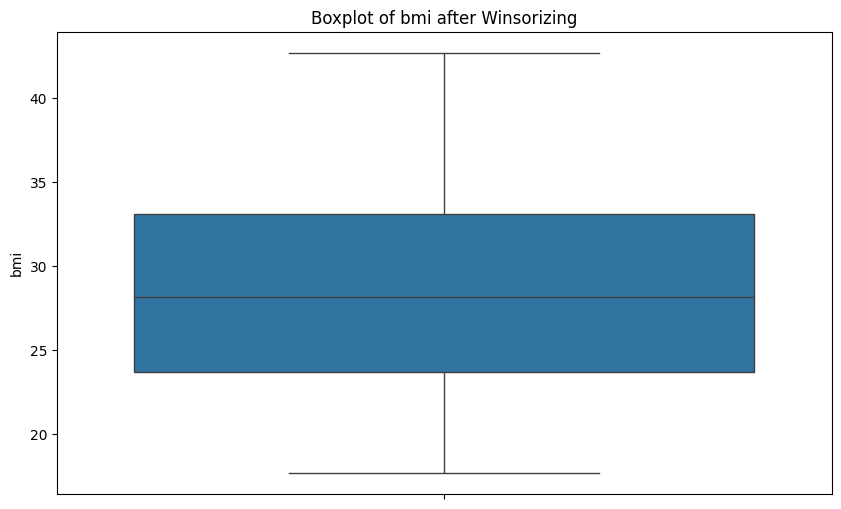

In [50]:
from scipy.stats.mstats import winsorize

# Winsorize the 'bmi' column
df_encoded['bmi'] = winsorize(df_encoded['bmi'], limits=[0.05, 0.05])

# Visualisasi distribusi bmi setelah Winsorizing
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_encoded['bmi'])
plt.title('Boxplot of bmi after Winsorizing')
plt.show()

In [ ]:
# # Winsorize the 'avg_glucose_level' column
# df_encoded['avg_glucose_level'] = winsorize(df_encoded['avg_glucose_level'], limits=[0.05, 0.05])

# # Visualize the distribution of avg_glucose_level after Winsorizing
# plt.figure(figsize=(10, 6))
# sns.boxplot(y=df_encoded['avg_glucose_level'])
# plt.title('Boxplot of avg_glucose_level after Winsorizing')
# plt.show()


KeyError: 'avg_glucose_level'

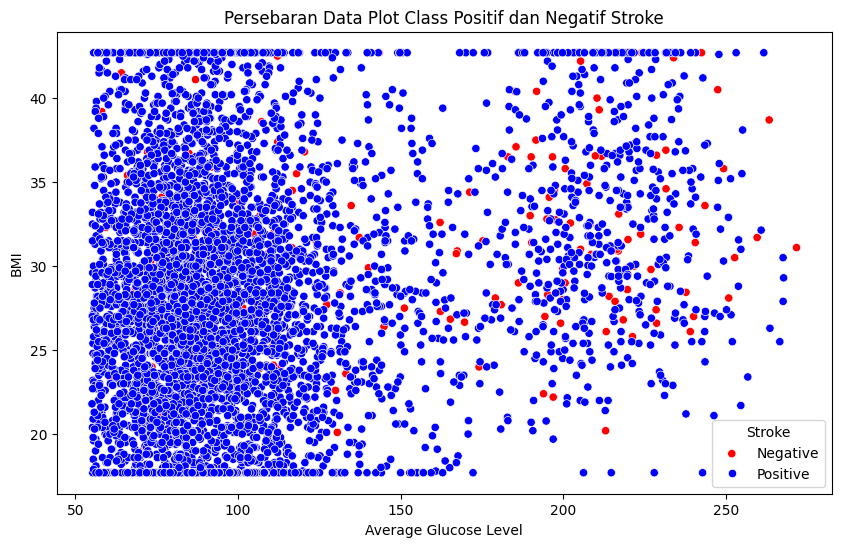

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', data=df_encoded, palette=['blue', 'red'])
plt.title('Persebaran Data Plot Class Positif dan Negatif Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.legend(title='Stroke', labels=['Negative', 'Positive'])
plt.show()

# Scale Numerical Features
We apply MinMaxScaler to scale the numerical features to a range between 0 and 1.

In [61]:
columns_to_scale = ['age', 'avg_glucose_level', 'bmi']

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply the MinMaxScaler to the selected columns
df_encoded[columns_to_scale] = min_max_scaler.fit_transform(df_encoded[columns_to_scale])

# Save Original Feature Names
We save the original feature names for reference.

In [62]:
# Save the original feature names
original_feature_names = df_encoded.columns.tolist()

# Rename Features
We rename the features to x1, x2, ..., and the target to y for simplicity.

In [63]:
# Rename the features to x1, x2, ..., and the target to y
df_encoded.columns = ['x' + str(i+1) if col != 'stroke' else 'y' for i, col in enumerate(df_encoded.columns)]

# Save Cleaned Data
Finally, we save the cleaned and processed data to a CSV file.

In [ ]:
# df_encoded.to_csv('clean_data.csv', index=False)